In [2]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [3]:
# Specify the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953903,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.944016,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056946,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225067,86709100


In [5]:
# Define window sizes for short-term and long-term moving avgs
short_window = 20
long_window = 50

# Calculate moving avgs
stock_data['Short_MA'] = stock_data['Close'].rolling(window=short_window, min_periods=1).mean()
stock_data['Long_MA'] = stock_data['Close'].rolling(window=long_window, min_periods=1).mean()

ValueError: x and y must be the same size

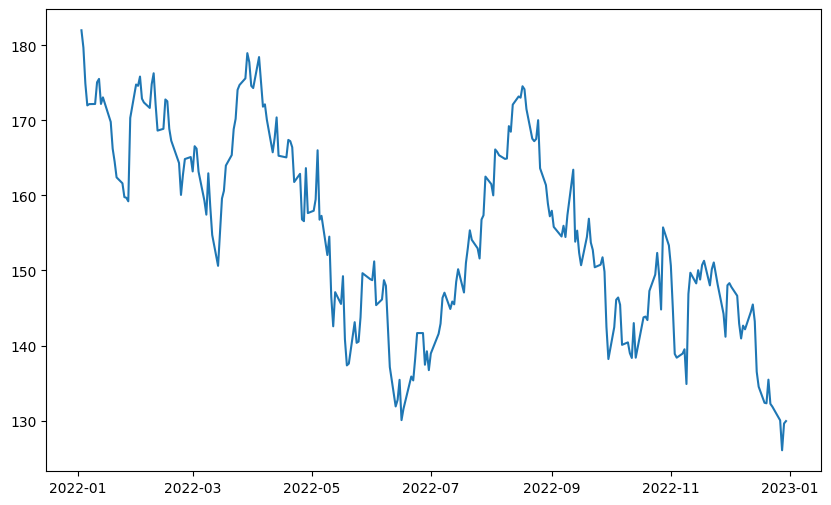

In [6]:
# Define a threshold for the anomaly detection
threshold = 0.02 # You an adjust this thresh based on your data

# Detect anomalies
stock_data['Anomaly'] = np.where((stock_data['Short_MA'] - stock_data['Long_MA']) / stock_data['Long_MA'] < threshold, 1, 0)

plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.scatter(stock_data.index, stock_data['Close'][stock_data['Anomaly'] == 1], color='red', label='Anomaly')
plt.legend()
plt.show()